<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Drugscom_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drugs.com Data Exploration

Description - 

Attribute Information:

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
from wordcloud import WordCloud


In [2]:
#Cloning Git repository
!git clone https://github.com/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System.git

Cloning into 'Medicines-and-Common-Treatment-Recommendation-System'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 105 (delta 57), reused 30 (delta 9), pack-reused 0
Receiving objects: 100% (105/105), 44.43 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [3]:
!ls Medicines-and-Common-Treatment-Recommendation-System/Drugscom

 drugsComTest_raw.csv   drugsComTrain_raw.tsv
 drugsComTest_raw.tsv  'drugscom train treatments.xlsx'


In [4]:
# Importing dataset from drive
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/Drugscom')

Mounted at /content/gdrive/


## Data Loading

In [5]:
#Loading Data
Drugscom_train = pd.read_csv('/content/gdrive/My Drive/Drugscom/drugsComTrain_raw.csv')
Drugscom_test = pd.read_csv('/content/gdrive/My Drive/Drugscom/drugsComTest_raw.csv')


In [6]:
#Data set shape
print("Drugscom Train shape :" ,Drugscom_train.shape)
print("Drugscom Test shape :", Drugscom_test.shape)

Drugscom Train shape : (158189, 8)
Drugscom Test shape : (52994, 8)


In [7]:
#Converting date column to datetime datatype
Drugscom_train['date'] =  pd.to_datetime(Drugscom_train['date'], format='%m/%d/%Y')
Drugscom_test['date'] =  pd.to_datetime(Drugscom_test['date'], format='%m/%d/%Y')

In [8]:
#Data information
print("Training Data information :")
Drugscom_train.info()


Training Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158189 entries, 0 to 158188
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   158189 non-null  int64         
 1   drugName     158189 non-null  object        
 2   condition    158189 non-null  object        
 3   review       158189 non-null  object        
 4   rating       158189 non-null  int64         
 5   date         158189 non-null  datetime64[ns]
 6   usefulCount  158189 non-null  int64         
 7   treatments   158189 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 9.7+ MB


In [9]:
print("Test Data information :")
Drugscom_test.info()

Test Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52994 entries, 0 to 52993
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   52994 non-null  int64         
 1   drugName     52994 non-null  object        
 2   condition    52994 non-null  object        
 3   review       52994 non-null  object        
 4   rating       52994 non-null  int64         
 5   date         52994 non-null  datetime64[ns]
 6   usefulCount  52994 non-null  int64         
 7   treatments   52994 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.2+ MB


In [10]:
Drugscom_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,treatments
0,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,2009-09-23,20,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
1,153899,Amoxicillin,Otitis Media,"""Perforation in my right tympanic membrane (ea...",8,2011-04-12,16,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
2,153715,Amoxicillin,Otitis Media,"""This medication did not clear up the infectio...",2,2017-05-31,0,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
3,153780,Amoxicillin,Otitis Media,"""My son who was 7 months old at the time was p...",1,2016-12-09,0,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
4,153838,Amoxicillin,Otitis Media,"""This medication works amazingly for ear infec...",9,2013-10-02,12,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."


In [11]:
#Changing the "Unnamed: 0" column to uniqueId as it represents the unique id of the drugs
Drugscom_train=Drugscom_train.rename(columns={'Unnamed: 0' : 'uniqueId'})
Drugscom_test=Drugscom_test.rename(columns={'Unnamed: 0' : 'uniqueId'})

In [12]:
print("Drugscom Train shape :" ,Drugscom_train.columns)
print("Drugscom Test shape :", Drugscom_test.columns)

Drugscom Train shape : Index(['uniqueId', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'treatments'],
      dtype='object')
Drugscom Test shape : Index(['uniqueId', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'treatments'],
      dtype='object')


## Data understanding

### Checking if there are multiple reviews by the customer for particular medicine.

In [13]:
print("Unique IDs in Drugscom training set : " ,len(set(Drugscom_train['uniqueId'].values)))
print("Total length of Drugscom training set  : " ,Drugscom_train.shape[0])

Unique IDs in Drugscom training set :  158189
Total length of Drugscom training set  :  158189


It appears there is only one review by each customer.

## Checking the number of Drugs for each condition

For this analysis, I have combined the training set and testing set.

In [14]:
#Combining training and testing data
Drugscom_combined=pd.concat([Drugscom_train,Drugscom_test])

In [15]:
Drugscom_combined.head()

,uniqueId,drugName,condition,review,rating,date,usefulCount,treatments
0,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,2009-09-23,20,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
1,153899,Amoxicillin,Otitis Media,"""Perforation in my right tympanic membrane (ea...",8,2011-04-12,16,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
2,153715,Amoxicillin,Otitis Media,"""This medication did not clear up the infectio...",2,2017-05-31,0,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
3,153780,Amoxicillin,Otitis Media,"""My son who was 7 months old at the time was p...",1,2016-12-09,0,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."
4,153838,Amoxicillin,Otitis Media,"""This medication works amazingly for ear infec...",9,2013-10-02,12,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub..."


In [16]:
Drugscom_combined.shape

(211183, 8)

In [17]:
#To check the number of drugs per condition, I have grouped the data by "condition" column

Drugscom_conditon=pd.DataFrame(Drugscom_combined.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False))

#resetting index
Drugscom_conditon.reset_index(inplace=True)

Drugscom_conditon.head(10)

,condition,drugName
0,Pain,220
1,Birth Control,181
2,High Blood Pressure,146
3,Acne,127
4,Depression,115
5,Rheumatoid Arthritis,108
6,"Diabetes, Type 2",99
7,Allergic Rhinitis,95
8,Insomnia,85
9,Osteoarthritis,84


In [18]:
#visualizing the top 10 condition having maximum drugs available
fig = px.bar(Drugscom_conditon[:10], x='condition', y='drugName', color='drugName',labels={'drugName':'Count of Drugs'}, height=500, width=1500,title="Top 10 Conditions with highest number of Drugs availability")
fig.show()

##Ratings of Top 10 drugs 

In [19]:
#ratings of top-10 drugs 
top_10_drugs=Drugscom_combined["drugName"].value_counts().sort_values(ascending=False)[:10]
top_10_drugs_df=pd.DataFrame(zip(top_10_drugs.index, top_10_drugs), columns = ["drugName", "count"])
rating_top_10_df=Drugscom_combined.loc[Drugscom_combined["drugName"].isin(top_10_drugs.index), :]
rating_top_10_df

,uniqueId,drugName,condition,review,rating,date,usefulCount,treatments
4039,141925,Escitalopram,Bipolar Disorder,"""Im 28 yr old male. I was always depressed Fev...",9,2010-01-16,26,"carbamazepine medications, Mood stabilizing me..."
4040,140875,Escitalopram,Bipolar Disorder,"""My experience with lexapro has been a very ro...",4,2016-05-18,6,"carbamazepine medications, Mood stabilizing me..."
4041,142029,Escitalopram,Bipolar Disorder,"""It was great as soon as I took it I felt a hu...",10,2008-12-15,16,"carbamazepine medications, Mood stabilizing me..."
4042,141584,Escitalopram,Bipolar Disorder,"""I wanted to give this medication a go, but wa...",10,2013-04-10,59,"carbamazepine medications, Mood stabilizing me..."
4043,141942,Escitalopram,Bipolar Disorder,"""I was on Celexa and the Lexapro seems to be b...",7,2009-11-16,11,"carbamazepine medications, Mood stabilizing me..."
...,...,...,...,...,...,...,...,...
52964,127422,Phentermine,Weight Loss,"""I have always been up and down with my weight...",10,2017-11-06,18,"Phentermine (Adipex, Ionamin, Suprenza) and di..."
52966,128879,Phentermine,Weight Loss,"""I started Fastin 30mg from my doctor on May 1...",8,2014-06-26,221,"Phentermine (Adipex, Ionamin, Suprenza) and di..."
52969,138900,Phentermine,Weight Loss,"""During my pregnancy I put on about 50 lbs! No...",8,2010-05-11,4,"Phentermine (Adipex, Ionamin, Suprenza) and di..."
52972,127978,Phentermine,Weight Loss,"""First week 7 lbs lost, 2nd week 8 lbs lost, w...",8,2016-10-19,6,"Phentermine (Adipex, Ionamin, Suprenza) and di..."


Text(0.5, 0, 'Drug name')

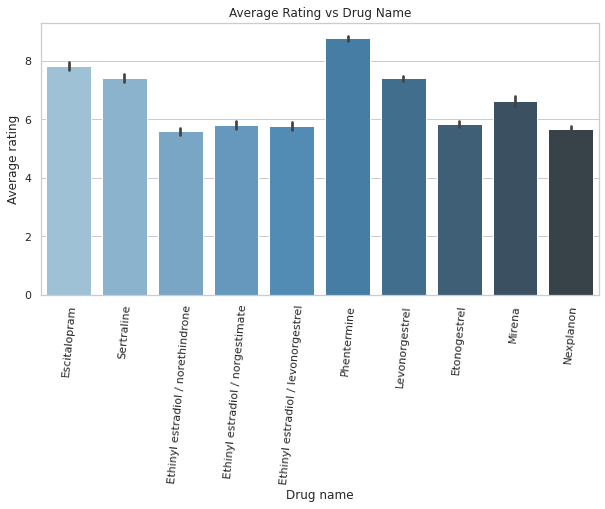

In [28]:
#ratings(average-variance) of top-10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="drugName", y="rating", data=rating_top_10_df, palette=sns.color_palette("Blues_d", 10))
plt.xticks(rotation=85)
plt.title("Average Rating vs Drug Name")
plt.ylabel("Average rating")
plt.xlabel("Drug name")

##Number of reviews overtime

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



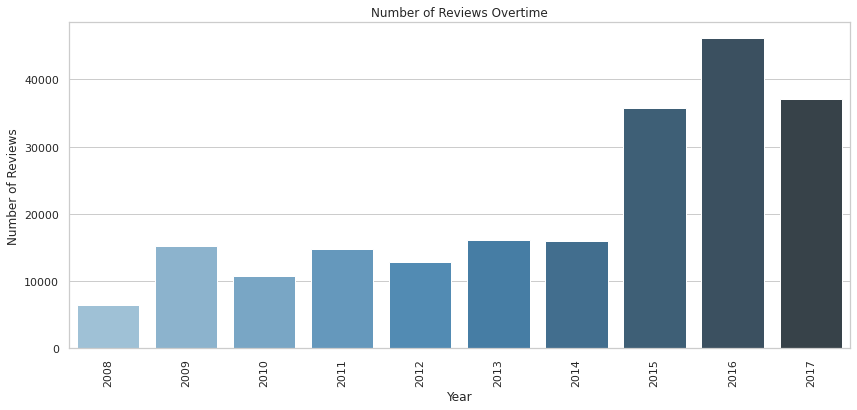

In [31]:
cnt_srs = Drugscom_combined['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, palette='Blues_d')
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title("Number of Reviews Overtime")
plt.show()

##Count of ratings vs Distribution plot of ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Rating')

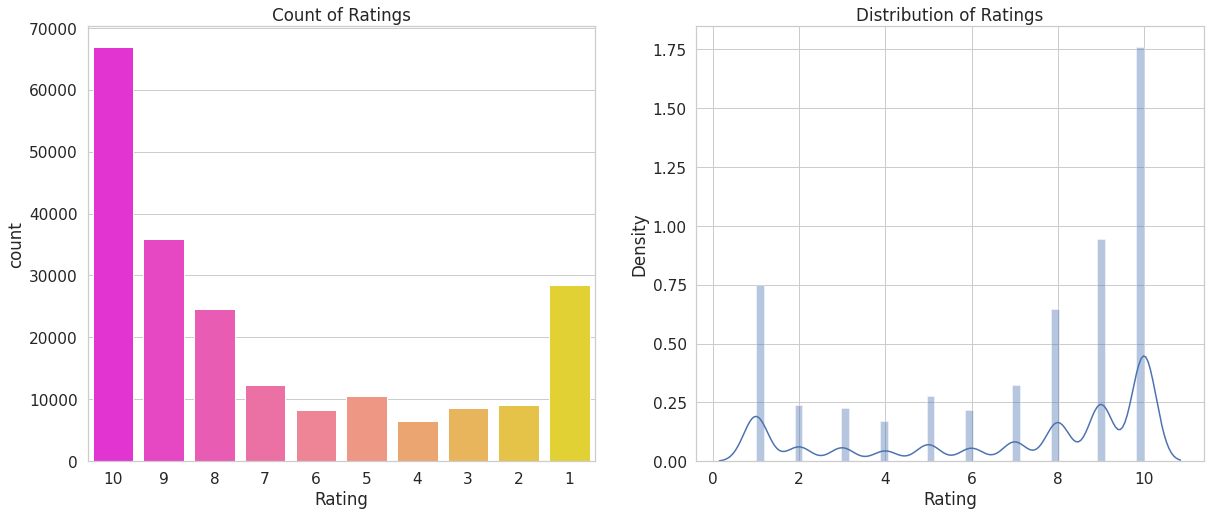

In [22]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(Drugscom_combined['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(Drugscom_combined['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

##Word cloud of the reviews with rating 10



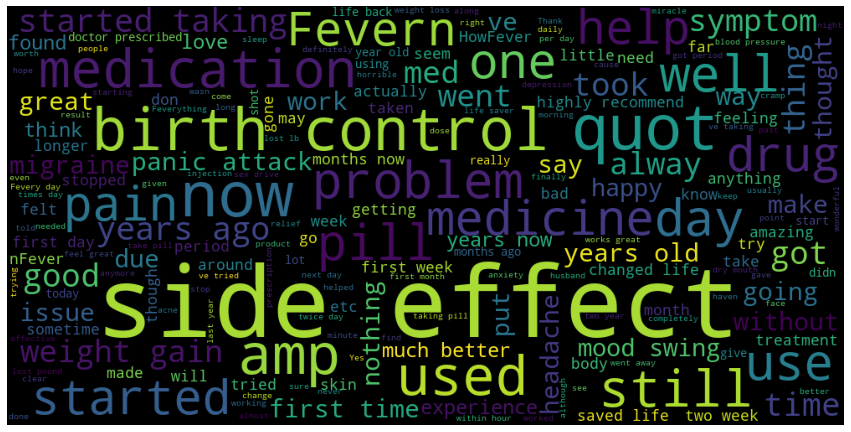

In [32]:
# Word cloud of the reviews with rating equal to 10
df_wordcloud = Drugscom_combined.loc[Drugscom_combined.rating == 10, 'review']
word = (' '.join(df_wordcloud))

cloud = WordCloud(width = 1000, height = 500).generate(word)
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off');

In [24]:
Drugscom_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211183 entries, 0 to 52993
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uniqueId     211183 non-null  int64         
 1   drugName     211183 non-null  object        
 2   condition    211183 non-null  object        
 3   review       211183 non-null  object        
 4   rating       211183 non-null  int64         
 5   date         211183 non-null  datetime64[ns]
 6   usefulCount  211183 non-null  int64         
 7   treatments   211183 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 19.5+ MB


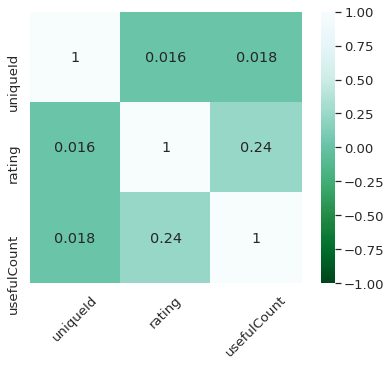

In [36]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = Drugscom_combined.select_dtypes(include = ['int64','float64']).corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap='BuGn_r', square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);



References - 

https://www.kaggle.com/aysenur95/text-classification-1-eda
https://www.kaggle.com/sumitm004/eda-and-sentiment-analysis/notebook
https://plotly.com/python/histograms/

